<a href="https://colab.research.google.com/github/ferjozsot23/secutiry-ecuador/blob/main/DetenidosEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

## DATA SET


**Personas Detenidas/Aprehendidas**

Información estadística accesible, oportuna, consistente, integrada, confiable y de calidad sobre los detenidos y aprehendidos, a nivel nacional, local y territorial, que permita conocer las características de esta población, las infracciones a la ley cometidas y establecer una trazabilidad con los procesos judiciales. [1]

## METADATOS



1.   **Source**: Ministerio del Interior
2.   **Author**: Diana Monserrat Hinojosa Colina
3.   **Update**: 22 de septiembre de 2023



# LIBRARIES IMPORT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image

In [ ]:
det99 = pd.read_excel("mdi_detenidosaprehendidos_pm_2023_enero_agosto.xlsx")

In [ ]:
det = det99.copy()

---

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
det.dtypes

codigo_iccs                            object
tipo                                   object
estado_civil                           object
estatus_migratorio                     object
edad                                   object
sexo                                   object
genero                                 object
nacionalidad                           object
autoidentificacion_etnica              object
numero_detenciones                      int64
nivel_de_instruccion                   object
condicion                              object
movilizacion                           object
tipo_arma                              object
arma                                   object
fecha_detencion_aprehension    datetime64[ns]
hora_detencion_aprehension             object
lugar                                  object
tipo_lugar                             object
codigo_distrito                        object
codigo_circuito                        object
codigo_subcircuito                

* **Insight**: Se cuenta con datos relevantes de las circunstancias del momento de la detención

In [ ]:
det.nivel_de_instruccion.unique()

array(['BACHILLERATO', 'SIN DATO',
       'TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO', 'NO APLICA',
       'EDUCACIÓN GENERAL BÁSICA', 'CUARTO NIVEL O DE POSGRADO',
       'EDUCACIÓN INICIAL'], dtype=object)

* **Insight**: Se cuenta con todos los tipos de educación

In [ ]:
det.autoidentificacion_etnica.value_counts().head(10)

MESTIZO/A                              35895
AFROECUATORIANO/A  AFRODESCENDIENTE     2108
INDÍGENA                                 821
MONTUBIO/A                               641
SHUAR                                    271
KICHWA                                   266
NEGRO/A                                  260
BLANCO/A                                 241
MULATO/A                                 236
MANTA                                     39
Name: autoidentificacion_etnica, dtype: int64

* **Insigth**: La población mestiza es detenida aproxiamdamente 17 más veces que la población afroecuatoriana

In [ ]:
det.estado_civil.value_counts()

SOLTERO/A         36749
CASADO/A           7834
DIVORCIADO/A       3253
SIN DATO           2817
UNION DE HECHO      500
VIUDO/A             262
Name: estado_civil, dtype: int64

* **Insigth**: La mayoría de detenidos son solteros/as

In [ ]:
det_corr = det.corr()
det_corr

<ipython-input-85-2450619028d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  det_corr = det.corr()


,numero_detenciones,codigo_canton,codigo_parroquia
numero_detenciones,1.000000,-0.002293,-0.002293
codigo_canton,-0.002293,1.000000,0.999797
codigo_parroquia,-0.002293,0.999797,1.000000


* **Insigth**: No existe una correlación relevante entre los datos numéricos

In [ ]:
det.tipo.value_counts()

APREHENDIDO    37747
DETENIDO       13668
Name: tipo, dtype: int64

* **Insigth**: Existen más personas aprenhendidas que detenidas

In [ ]:
det.numero_detenciones.value_counts()

0    51414
1        1
Name: numero_detenciones, dtype: int64

* **Insigth**: Casi todos los detenidos han comentido 0 detenciones con anterioridad

In [ ]:
det.tipo_arma.value_counts()

NINGUNA                                       45485
ARMAS DE FUEGO                                 4267
ARMAS BLANCAS (OBJETO CORTANTE O PUNZANTE)     1663
Name: tipo_arma, dtype: int64

* **Insigth**: Las detenciones se hacen cuando la persona no tiene un arma. Esto sucede **10 veces más** que cuando tiene un arma de fuego

In [ ]:
pd.DataFrame(det.lugar.value_counts()).head(10)

,lugar
VÍA PÚBLICA,33973
ESPACIO PRIVADO,6901
CASA/VILLA,4145
PARQUE Y PLAZA,657
UNIDAD EDUCATIVA,317
POLICÍA NACIONAL,311
OTRO LOCAL COMERCIAL,299
CENTRO COMERCIAL,271
CANCHAS DE USO MÚLTIPLE,185
TERRENO BALDÍO,184


* **Insigth**: Donde se detiene mayoritariamente es en la vía pública o espacio privado

In [ ]:
det.query(
    'presunta_infraccion == "CONTRAVENCIÓN DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR"'
    ).groupby("lugar").size().sort_values(ascending=False).head(10)

lugar
VÍA PÚBLICA                        981
ESPACIO PRIVADO                    754
CASA/VILLA                         629
CONSEJO DE LA JUDICATURA            55
POLICÍA NACIONAL                    28
DEPARTAMENTO EN CASA O EDIFICIO     28
JUZGADO                             23
CUARTO EN CASA DE INQUILINATO       22
PARQUE Y PLAZA                      18
UNIDAD EDUCATIVA                    17
dtype: int64

* **Insigth**: A pesar de que los que ejercen violencia contra la mujer o la familia se detienen en espacio privado, mayoritariamente se lo realiza en la vía pública, esto debido a las boletas de apremio

In [ ]:
det_most_infraccion_provincia = det.groupby(["nombre_provincia", "presunta_infraccion" ]).size().sort_values(ascending=False).head(15)
det_most_infraccion_provincia

nombre_provincia                presunta_infraccion                                                                          
GUAYAS                          DELITOS CONTRA EL DERECHO A LA PROPIEDAD                                                         2838
                                DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    2510
PICHINCHA                       DELITOS CONTRA EL DERECHO A LA PROPIEDAD                                                         2047
                                BOLETAS                                                                                          1939
GUAYAS                          DELITOS CONTRA LA SEGURIDAD PÚBLICA                                                              1541
PICHINCHA                       DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    1375
GUAYAS                          BOLETAS                               

* **Insigth 1:**: La segunda mayor infracción de Guayas es producción o tráfico de sustancias sujetas a fiscalización, mientras que en quito la segunda son boletas. Se presupone que en Guayaquil existe más drogas
* **Insigth 2:**: En las dos ciudades más grandes de Ecuador, la primera razón de detención es por el delito contra el derecho a la propiedad (robos, asaltos)

Vamos a analizar cuáles son las infracciones más cometidas a nivel nacional

In [ ]:
df_bar_infraccion = pd.DataFrame(det.groupby(["presunta_infraccion"]).size().sort_values(ascending=False)).head(10)

In [ ]:
df_bar_infraccion = df_bar_infraccion.rename(
    columns={
        0: "count"
        }
    )
df_bar_infraccion

,count
presunta_infraccion,
DELITOS CONTRA EL DERECHO A LA PROPIEDAD,9829
BOLETAS,8132
DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN,7624
CONTRAVENCIONES DE TRÁNSITO,4154
DELITOS CONTRA LA SEGURIDAD PÚBLICA,4110
CONTRAVENCIÓN DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR,3293
DELITOS DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR,2673
CONTRAVENCIONES,1697
DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRACIÓN PÚBLICA,1362


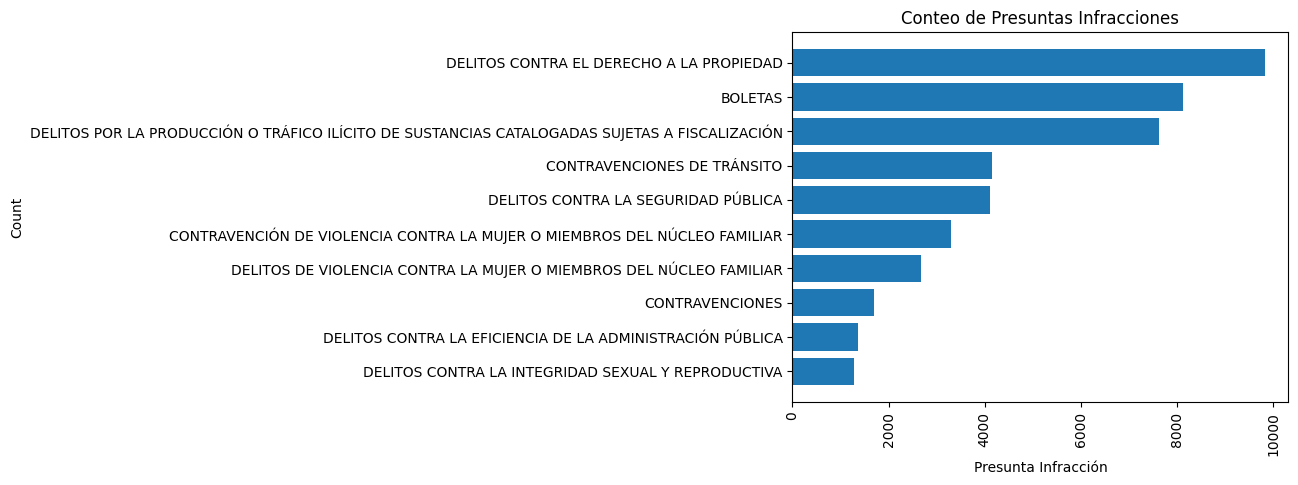

In [ ]:
df_bar_infraccion = df_bar_infraccion.sort_values(by='count')


plt.barh(df_bar_infraccion.index, df_bar_infraccion['count'])
plt.xlabel('Presunta Infracción')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Conteo de Presuntas Infracciones')
plt.show()


* **Insigth:**: Delitos contra el derecho a la propiedad (robos, asaltos, etc) son los más repetitivos a esacala nacional, luego le sigue las Boletas

Text(0, 0.5, 'Cantidad detenidos')

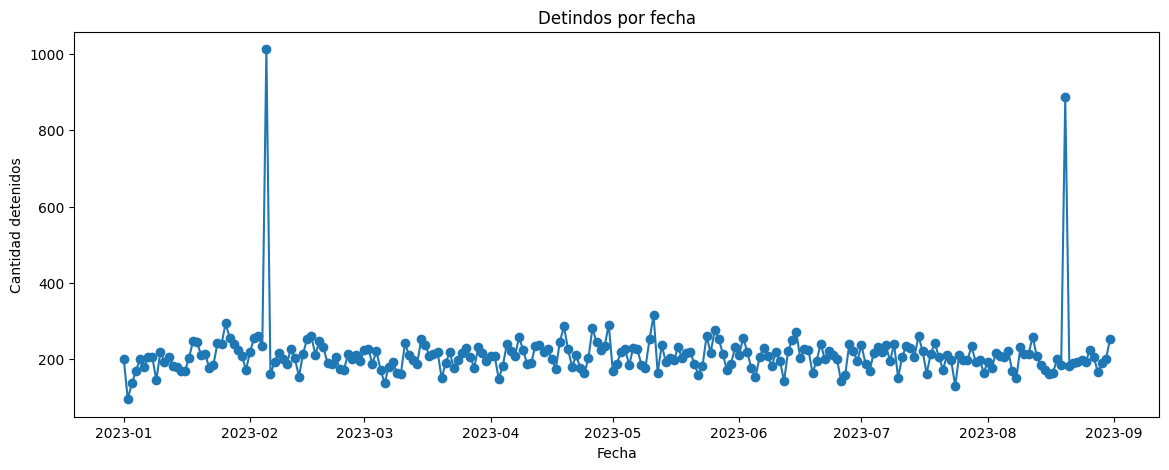

In [ ]:
det_fecha_count = det.groupby(det["fecha_detencion_aprehension"]).size()

plt.figure(figsize=(14, 5))

plt.title("Detindos por fecha")
plt.plot(det_fecha_count.index, det_fecha_count.values, marker="o")
plt.xlabel("Fecha")
plt.ylabel("Cantidad detenidos")

* **Insigth:**: Se nota que la tendencia de detenidos durante el año 2023 es estable, sin embargo existe 2 días en los que han habido dos dentidos

Vamos a averiguar qué pudo haber causado esta cantidad inusual de detenidos

* **Insigth:**: En las fechas 2023-08-20 y 2023-02-05 se celebró consulta pouplar por Guillermo Lasso y Primera Vuelta Presidencial correspondientemente

In [ ]:
url_policia = "https://pbs.twimg.com/media/FoOIW6MXgAE2zML?format=jpg&name=medium"
url_vuelta = "https://cnnespanol.cnn.com/wp-content/uploads/2023/02/230205172614-jornada-electoral-en-ecuador-full-169.jpeg?quality=100&strip=info"

Image(url=url_policia, width=400)


In [ ]:
Image(url=url_vuelta, width=400)

Averiguemos por cuales fueron las principales causas de detención de aquellos días

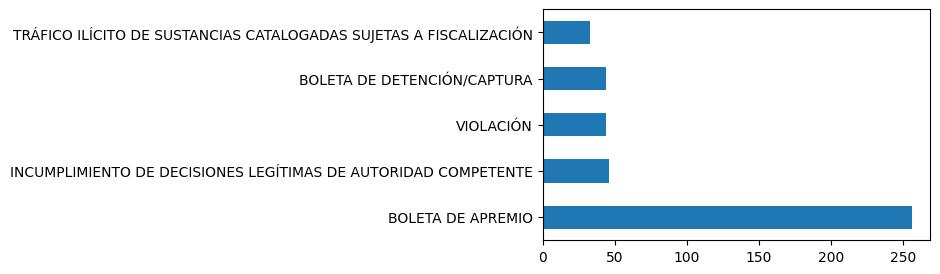

In [ ]:
plt.figure(figsize=(5, 3))
det_primera_vuelta = det[det["fecha_detencion_aprehension"] == "2023-08-20"]["presunta_subinfraccion"].value_counts().head(5).plot(kind="barh")
plt.show()

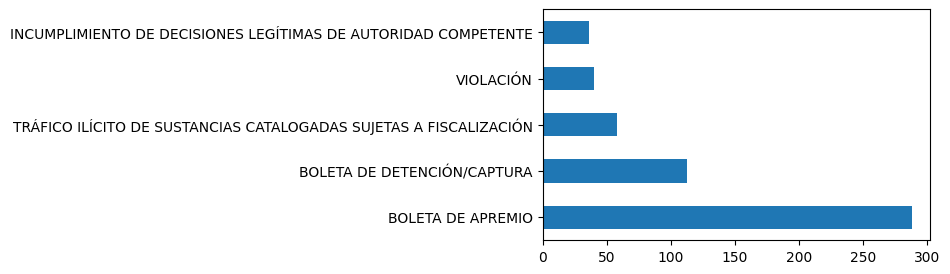

In [ ]:
plt.figure(figsize=(5, 3))
det_consulta = det[det["fecha_detencion_aprehension"] == "2023-02-05"]["presunta_subinfraccion"].value_counts().head(5).plot(kind="barh")
plt.show()

* **Insigth 1:**: Una vez analizado los dos días, se nota que la principal cuasa ya no es sobre le derecho a la propiedad (razón principal durante todo el año), sino que ahora es Boletas de apremio.

Boletas de apremio: La boleta de apremio es una medida que los jueces aplican para que una determinada persona cumpla con las obligaciones alimenticias de su hijo o hija. [2]


* **Insigth 2:**: Las personas que deben su obligación de pensión alimenticia fueron inevitablemente detenidas **debido a que en esos 2 días fueron a sufragar**

---

# DATA CLEANING

Reemplazar los valores "SIN DATOS" por nan

In [ ]:
det = det.replace("SIN DATOS", np.nan)
det = det.replace("SIN DATO", np.nan)

In [ ]:
det.isna().sum()

codigo_iccs                        0
tipo                               0
estado_civil                    2817
estatus_migratorio             17924
edad                             751
sexo                               0
genero                             0
nacionalidad                      11
autoidentificacion_etnica       3690
numero_detenciones                 0
nivel_de_instruccion           19379
condicion                       2172
movilizacion                    3534
tipo_arma                          0
arma                               0
fecha_detencion_aprehension        0
hora_detencion_aprehension         0
lugar                              0
tipo_lugar                         0
codigo_distrito                    0
codigo_circuito                    0
codigo_subcircuito                 0
nombre_zona                        0
nombre_subzona                     0
nombre_distrito                    0
nombre_circuito                    0
nombre_subcircuito                 0
c

Shape antes de realizar el drop na

In [ ]:
det.shape

(50396, 38)

Se analiza las columnas que se pueden eliminar sus na. Las otras columnas tienen un gran porcentaje de na por tanto no se consideran para su eliminación

In [ ]:
det = det.dropna(subset=["estado_civil", "autoidentificacion_etnica", "condicion", "movilizacion", "edad", "nacionalidad"])

Aproximadamente 10000 registros fueron eliminados ya que eran na

In [ ]:
det.shape

(41072, 37)

### Nivel de instrucción y edad para ser detenido

In [ ]:
det.nivel_de_instruccion.unique()

array(['BACHILLERATO', 'SIN DATO',
       'TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO', 'NO APLICA',
       'EDUCACIÓN GENERAL BÁSICA', 'CUARTO NIVEL O DE POSGRADO',
       'EDUCACIÓN INICIAL'], dtype=object)

El nivel de instrucción puede ser mapeado a valores ordinarios, por ejemplo de 1 a 5

In [ ]:
mapeo_nivel_instruccion = {
    "NO APLICA": 0,
    "EDUCACIÓN INICIAL": 1,
    "EDUCACIÓN GENERAL BÁSICA": 2,
    "BACHILLERATO": 3,
    "TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO": 4,
    "CUARTO NIVEL O DE POSGRADO": 5
}


In [ ]:
det['nivel_de_instruccion'].isna().sum()

12696

In [ ]:
# Aplicar el mapeo
det["nivel_de_instruccion"] = det["nivel_de_instruccion"].map(mapeo_nivel_instruccion)

Text(0, 0.5, 'Número de detenidos')

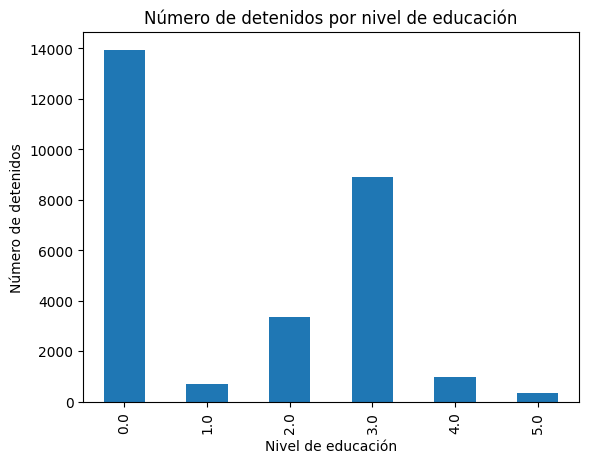

In [ ]:
det["nivel_de_instruccion"].value_counts().sort_index().plot(kind="bar")

plt.title("Número de detenidos por nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Número de detenidos")

* **Insigth:**: Se comenten mas delitos cuando se encuentra en nivel de educación 3 (Bachillerato). Aproximadamente entre los 18 y 21 años

Veamos la relación con la edad

In [ ]:
det["edad"].isna().sum()

0

In [ ]:
det["edad"] = det["edad"].astype(float)

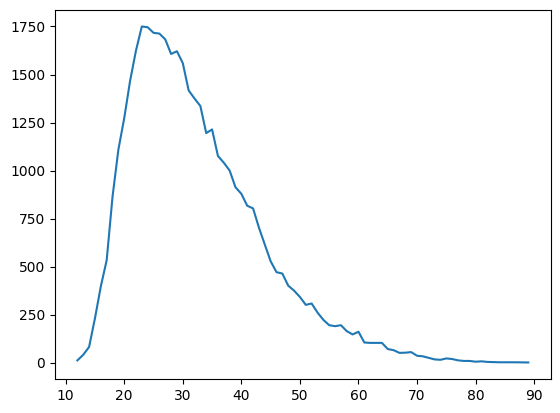

In [ ]:
edad_countdet = pd.DataFrame(det.groupby("edad").size())
edad_countdet.rename(columns={0: "count"}, inplace=True)

plt.plot(edad_countdet.index, edad_countdet["count"])

* **Insigth:**: Las personas que más son detenidos tienen una edad de 21 años, lo que tiene relación con el **nivel de instrucción Bachillerato**

### Provincias secundarias y sus variantes

Cotopaxi los 3 delitos más cometidos por sexo mujer

In [ ]:
det_mostinfraction_cotopaxi_mujer = det[
    (det["nombre_provincia"] == "COTOPAXI") &
    (det["sexo"] == "MUJER")
].groupby("presunta_infraccion").size().sort_values(ascending=True).head(10)


<Axes: ylabel='presunta_infraccion'>

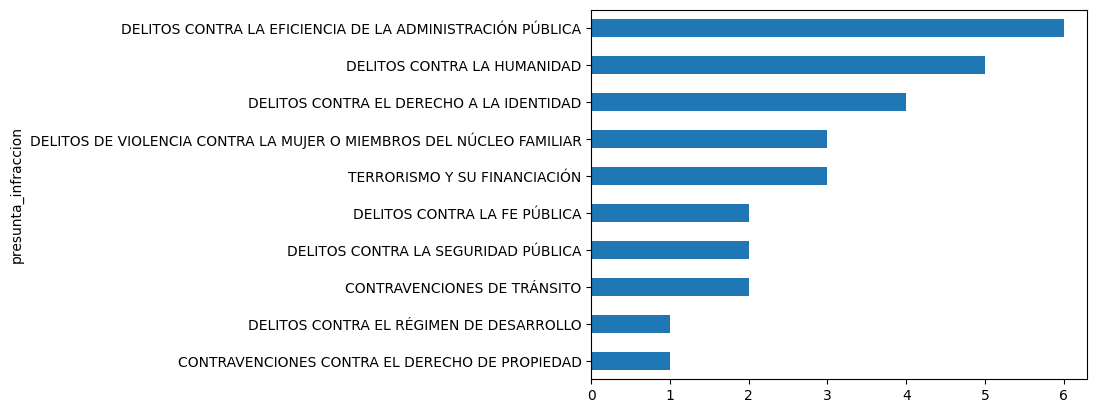

In [ ]:
det_mostinfraction_cotopaxi_mujer.plot(kind="barh")


* **Insigth 1:**: Se puede notar que la infracción en provincias secundarias dista mucho con las provincias principales
* **Insigth 2:**: La infracción más popular a nivel nacional ocupa el 10mo lugar en provincias secundarias
* **Insigth 3:**: Las provincias principales concentran infracciones de robos, boletas y drogas

<ipython-input-54-ea0bc833c332>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = det.corr()


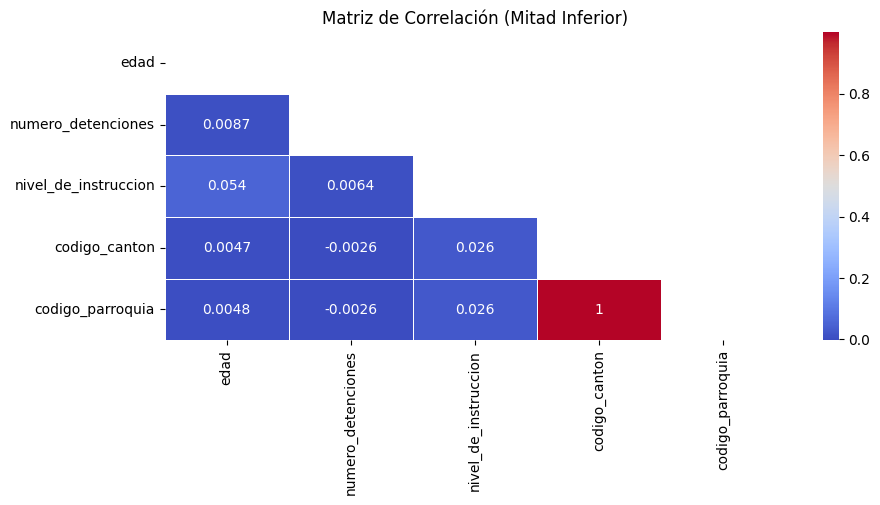

In [ ]:

correlation_matrix = det.corr()

mask = np.triu(correlation_matrix)

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación (Mitad Inferior)")
plt.show()


In [ ]:
det["hora_detencion_aprehension_hour"] = det["hora_detencion_aprehension"].apply(lambda x: x.hour)
det["hora_detencion_aprehension_hour"]

0        13
1        19
2        16
3        17
4         2
         ..
51410    22
51411    22
51412     4
51413    15
51414    12
Name: hora_detencion_aprehension_hour, Length: 50396, dtype: int64

Se  crea un atriubto de hora para facilitar la visualización de los datos

In [ ]:
det["presunta_flagrancia"].unique()

array(['SI', 'NO'], dtype=object)

In [ ]:
det["presunta_subinfraccion"].value_counts().sort_values(ascending=False).head(4)

TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    7244
BOLETA DE APREMIO                                                    5257
TENENCIA Y PORTE DE ARMAS                                            3536
CONDUCCIÓN DE VEHÍCULO EN ESTADO DE EMBRIAGUEZ                       3439
Name: presunta_subinfraccion, dtype: int64

* **Insigth:**: Las subinfracciones más cometidas a nivel nacional es tráfico ilícito de drogas

In [ ]:
det["tipo_arma"].value_counts().sort_values(ascending=False)

NINGUNA                                       36479
ARMAS DE FUEGO                                 3166
ARMAS BLANCAS (OBJETO CORTANTE O PUNZANTE)     1217
Name: tipo_arma, dtype: int64

<Axes: >

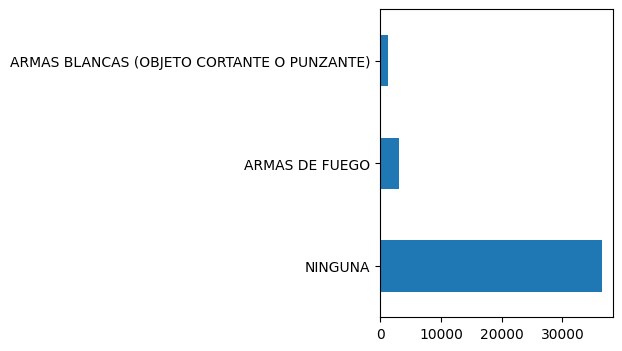

In [ ]:
plt.figure(figsize=(3,4))
det["tipo_arma"].value_counts().head(3).plot(kind="barh")

* **Insigth 1:**: La infracciones se comente con ningún arma, aproximadamente 9 veces más que con un arma de fuego

Analicemos las subinfracciones acorde al tipo de arma

In [ ]:
det[det["tipo_arma"] == "NINGUNA"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(10)

presunta_subinfraccion
TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    6989
BOLETA DE APREMIO                                                    5249
CONDUCCIÓN DE VEHÍCULO EN ESTADO DE EMBRIAGUEZ                       3434
VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR             3154
VIOLENCIA FÍSICA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR      2129
RECEPTACIÓN                                                          1956
ROBO A PERSONAS                                                      1924
BOLETA DE DETENCIÓN/CAPTURA                                          1811
TENENCIA Y PORTE DE ARMAS                                             996
INCUMPLIMIENTO DE DECISIONES LEGÍTIMAS DE AUTORIDAD COMPETENTE        923
dtype: int64

Subinfracciones que más se cometen sin arma

In [ ]:
det[det["tipo_arma"] == "ARMAS DE FUEGO"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(10)

presunta_subinfraccion
TENENCIA Y PORTE DE ARMAS                                                    2524
ROBO A PERSONAS                                                               444
TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN             224
ARMAS DE FUEGO, MUNICIONES Y EXPLOSIVOS NO AUTORIZADOS                        123
ASESINATO                                                                      95
TENTATIVA                                                                      78
TRÁFICO ILÍCITO DE ARMAS DE FUEGO, ARMAS QUÍMICAS, NUCLEARES O BIOLÓGICAS      69
ROBO A  UNIDADES ECONOMICAS                                                    64
ROBO DE CARROS                                                                 58
ROBO DE MOTOS                                                                  44
dtype: int64

Subinfracciones que más se cometen con armas de fuego

In [ ]:
det[det["tipo_arma"] == "ARMAS BLANCAS (OBJETO CORTANTE O PUNZANTE)"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(10)

presunta_subinfraccion
ROBO A PERSONAS                                                    509
TENTATIVA                                                          115
VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR           108
LESIONES                                                           104
VIOLENCIA FÍSICA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR     98
ROBO  A DOMICILIO                                                   48
INTIMIDACIÓN                                                        36
HOMICIDIO                                                           35
ROBO A  UNIDADES ECONOMICAS                                         35
ATAQUE O RESISTENCIA                                                34
dtype: int64

* **Insigth:**:



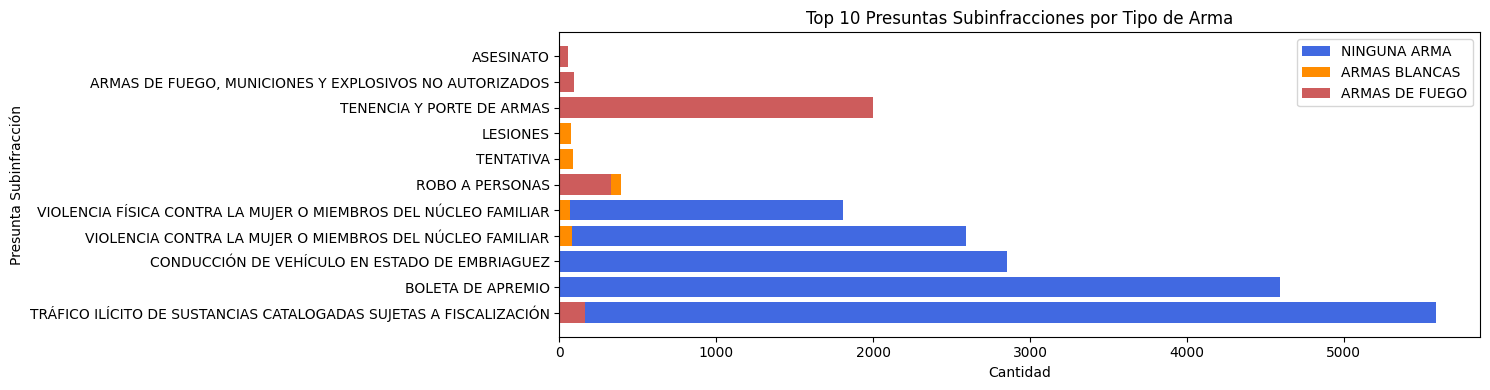

In [ ]:
# Filtrar datos y obtener los 10 valores principales para cada tipo de arma
armas_blancas = det[det["tipo_arma"] == "ARMAS BLANCAS (OBJETO CORTANTE O PUNZANTE)"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(5)
armas_de_fuego = det[det["tipo_arma"] == "ARMAS DE FUEGO"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(5)
ninguna_arma = det[det["tipo_arma"] == "NINGUNA"].groupby(["presunta_subinfraccion"]).size().sort_values(ascending=False).head(5)

# Crear un gráfico de barras combinado
plt.figure(figsize=(15, 4))
plt.barh(ninguna_arma.index, ninguna_arma.values, color='royalblue', label='NINGUNA ARMA')
plt.barh(armas_blancas.index, armas_blancas.values, color='darkorange', label='ARMAS BLANCAS')
plt.barh(armas_de_fuego.index, armas_de_fuego.values, color='indianred', label='ARMAS DE FUEGO')


plt.title('Top 10 Presuntas Subinfracciones por Tipo de Arma')
plt.xlabel('Cantidad')
plt.ylabel('Presunta Subinfracción')
plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()


* **Insigth:**: El robo a personas se realizan aproximadamente de la misma cantidad con arma o con cuchillo

---

# DATA ENGINEERING

In [ ]:
det.nombre_provincia.unique()

array(['AZUAY', 'EL ORO', 'GUAYAS', 'PICHINCHA', 'LOJA', 'SUCUMBIOS',
       'ZAMORA CHINCHIPE', 'IMBABURA', 'SANTO DOMINGO DE LOS TSACHILAS',
       'CARCHI', 'ORELLANA', 'CHIMBORAZO', 'TUNGURAHUA', 'NAPO',
       'COTOPAXI', 'BOLIVAR', 'MORONA SANTIAGO', 'PASTAZA', 'MANABI',
       'SANTA ELENA', 'ESMERALDAS', 'LOS RIOS', 'CAÑAR', 'GALAPAGOS',
       'MAR TERRITORIAL'], dtype=object)

In [ ]:
regiones = {
    'AZUAY': 'Sierra',
    'EL ORO': 'Costa',
    'GUAYAS': 'Costa',
    'PICHINCHA': 'Sierra',
    'LOJA': 'Sierra',
    'SUCUMBIOS': 'Oriente',
    'ZAMORA CHINCHIPE': 'Oriente',
    'IMBABURA': 'Oriente',
    'SANTO DOMINGO DE LOS TSACHILAS': 'Costa',
    'CARCHI': 'Sierra',
    'ORELLANA': 'Oriente',
    'CHIMBORAZO': 'Sierra',
    'TUNGURAHUA': 'Sierra',
    'NAPO': 'Oriente',
    'COTOPAXI': 'Sierra',
    'BOLIVAR': 'Oriente',
    'MORONA SANTIAGO': 'Oriente',
    'PASTAZA': 'Oriente',
    'MANABI': 'Costa',
    'SANTA ELENA': 'Costa',
    'ESMERALDAS': 'Costa',
    'LOS RIOS': 'Costa',
    'CAÑAR': 'Sierra',
    'GALAPAGOS': 'Insular',
    'MAR TERRITORIAL': 'Marítimo'
}

Se crea un nuevo atributo nombre_región que se determina a partir de la provincia

In [ ]:
det["nombre_region"] = det["nombre_provincia"].map(regiones)
det[["nombre_region", "nombre_provincia"]].loc[20:25,]

,nombre_region,nombre_provincia
20,Oriente,IMBABURA
21,Sierra,LOJA
22,Costa,GUAYAS
23,Costa,GUAYAS
25,Sierra,LOJA


In [ ]:
det_region_count = det["nombre_region"].value_counts()

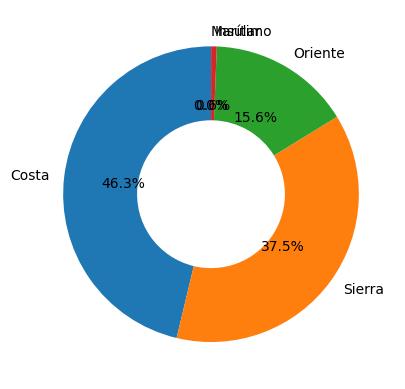

In [ ]:
fig, ax = plt.subplots()
ax.pie(det_region_count, labels=det_region_count.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.show()

* **Insigth:** Solo menos del 10% de diferencia dista la Sierra con la Costa en la cantidad de detenciones

---

# DATAFRAME EXPORT
## Future PowerBi Visualization

In [ ]:
det.to_excel("detenidos_cleaned.xlsx")

---

#CONCLUSIONS



1.   La infracción más recurrente que perjudica al Ecuador en el año 2023 es "Delitos contra la propiedad privada" en el que se engloban extorsión, abuso de confianza, aprovechamiento ilícito de servicios públicos, robo, apropiación fraudulenta por medios electrónicos, hurto, usurpación y abigeato entre otros
2.   En situaciones excepcionales como el sufragio nacional, el número de detenidos puede superar hasta cinco veces más que un día normal
3.   Las personas que mayoritariamente comenten delitos no tienen un título superario al de bachiller y 21 años de edad
4.   Las provincias secundarias, como Cotopaxi, no sufren de delitos contra la propiedad privada o tráfico de sustancias sujetas a fiscalización como las principales, sino delitos contra la familia y adminsitración pública




---

# REFERENCES

[1] Datosabiertos.gob.ec, "Personas Detenidas/Aprehendidas - Datos Abiertos Ecuador,” Datosabiertos.gob.ec, 2023. https://www.datosabiertos.gob.ec/dataset/personas-detenidas-aprehendidas (accessed Oct. 23, 2023).

[2] El Telégrafo, “¿Cómo saber si tengo orden de detención por no pagar pensiones alimenticias?” El Telégrafo, Oct. 13, 2023. https://www.eltelegrafo.com.ec/noticias/actualidad/44/como-saber-si-tengo-una-orden-de-detencion-por-no-pagar-pensiones-alimenticias#:~:text=La%20boleta%20de%20apremio%20es,de%20su%20hijo%20o%20hija. (accessed Oct. 23, 2023).
‌